In [8]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


,date,open,high,low,close,volume,average,barcount
0,2020-05-01,284.39,286.88,281.52,282.90,961603,283.308,418653
1,2020-05-04,280.56,283.90,278.69,283.51,662088,281.608,304302
2,2020-05-05,286.17,289.25,283.61,287.02,668806,287.652,294804
3,2020-05-06,287.76,288.96,282.70,283.68,631675,286.128,288508
4,2020-05-07,286.70,289.78,285.18,289.51,615768,288.287,279615
...,...,...,...,...,...,...,...,...
79,2020-08-24,341.20,343.43,340.59,343.39,356247,342.080,156849
80,2020-08-25,344.57,344.74,342.27,344.55,324100,343.426,141995
81,2020-08-26,344.40,348.36,344.05,347.77,399366,346.491,182436
82,2020-08-27,347.56,349.90,346.53,349.26,484545,348.567,225565


,date,open,high,low,close,volume,average,barcount
0,2020-05-01,284.39,286.88,281.52,282.90,961603,283.308,418653
1,2020-05-04,280.56,283.90,278.69,283.51,662088,281.608,304302
2,2020-05-05,286.17,289.25,283.61,287.02,668806,287.652,294804
3,2020-05-06,287.76,288.96,282.70,283.68,631675,286.128,288508
4,2020-05-07,286.70,289.78,285.18,289.51,615768,288.287,279615
...,...,...,...,...,...,...,...,...
79,2020-08-24,341.20,343.43,340.59,343.39,356247,342.080,156849
80,2020-08-25,344.57,344.74,342.27,344.55,324100,343.426,141995
81,2020-08-26,344.40,348.36,344.05,347.77,399366,346.491,182436
82,2020-08-27,347.56,349.90,346.53,349.26,484545,348.567,225565


Test Statistic                 -1.423101
p-value                         0.571152
#Lags Used                      0.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64

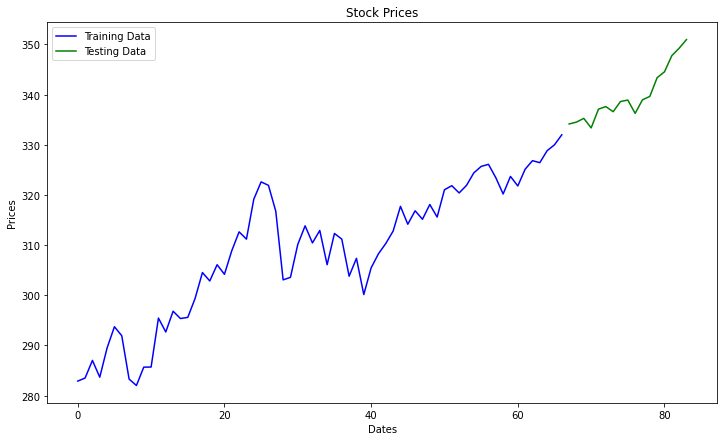

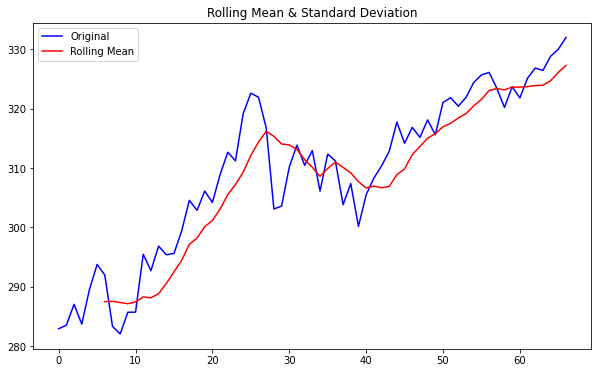

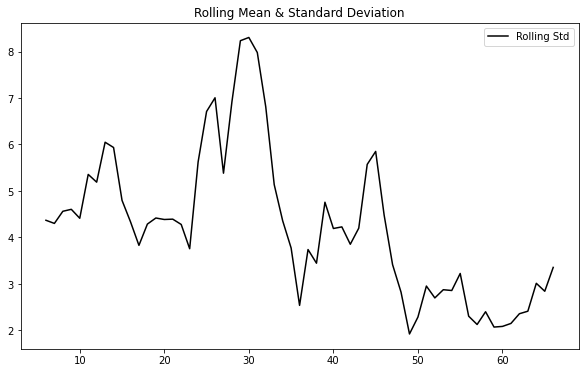

In [17]:
df = pd.read_csv('SPY_bar_sample.csv')
display(df)
dfug = df
display(dfug)
train_data, test_data = dfug.iloc[0:int(len(df)*0.8), :], dfug.iloc[int(len(df)*0.8):, :]
plt.figure(figsize=(12,7))
plt.title('Stock Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['close'], 'blue', label='Training Data')
plt.plot(test_data['close'], 'green', label='Testing Data')
plt.legend()

window = 7
train_series = train_data['close']

#Determing rolling statistics
rolmean = train_series.rolling(window).mean()
rolstd = train_series.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_series, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

fig = plt.figure(figsize=(10, 6))
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');




dftest = adfuller(train_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
display(dfoutput)

0     282.90
1     283.51
2     287.02
3     283.68
4     289.51
       ...  
79    343.39
80    344.55
81    347.77
82    349.26
83    350.98
Name: close, Length: 84, dtype: float64

59 25


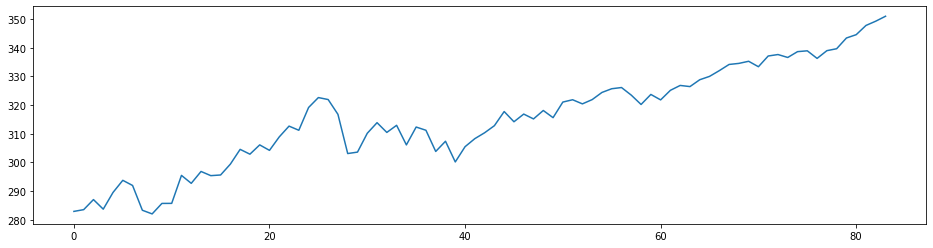

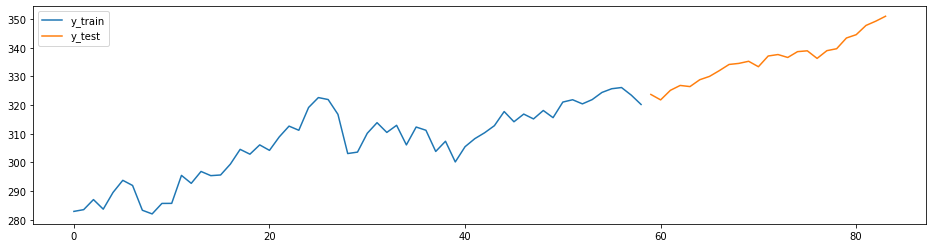

In [20]:
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys

y = df['close']
display(y)
fig, ax = plot_ys(y)

y_train, y_test = temporal_train_test_split(y, test_size=25)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

ModuleNotFoundError: No module named 'pmdarima'

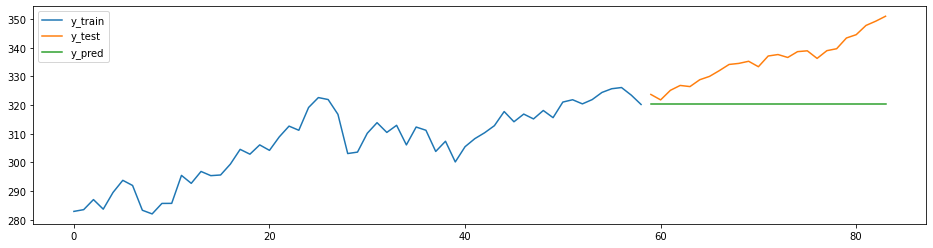

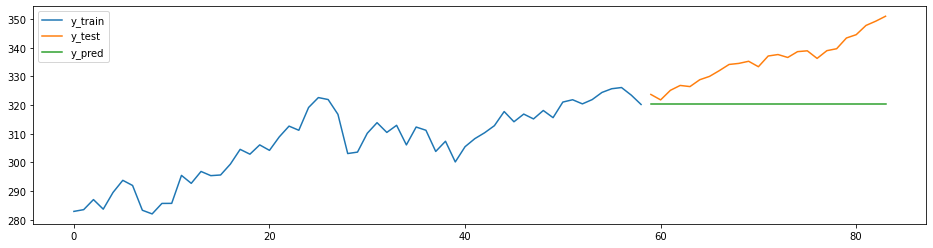

In [27]:
fh = np.arange(len(y_test)) + 1
y_pred = np.repeat(y_train.iloc[-1], len(fh))
y_pred = pd.Series(y_pred, index=y_train.index[-1] + fh)

plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA

forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_last = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_last, y_test)


forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_pred, y_test)